In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt

### 자료 내려받기

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
region_all = pd.read_excel("Region_total_first.xlsx")
region_all.head()

Unnamed: 0  total_pop  1564_pop  65_pop  남성_pop  내국인_pop  Forei_pop_rati  \
0      서울종로구     148857    111581   25859   71367   137913        0.073520   
1       서울중구     126310     94276   22635   60657   114942        0.090001   
2      서울용산구     221688    165056   35692  106910   205288        0.073978   
3      서울성동구     286469    213996   44996  139181   276273        0.035592   
4      서울광진구     347099    267150   50562  166469   328395        0.053887   

   통근통학_total_pop  통근통학15_pop  통근통학1530_pop  통근통학3045_pop  통근통학4560_pop  \
0           82692       16177         19880         25578          7890   
1           68167       12584         16732         24717          5644   
2          124078       18490         27727         46496         12167   
3          165458       24541         35418         65093         14513   
4          202218       30940         40768         71002         19635   

   통근통학6090_pop  통근통학90120_pop  통근통학120_pop  대학(4년제미만)_pop  대학교(4년제이상)_pop  \
0         10096           2949          122          11607           49976   
1          6475           1885          130          11517           39728   
2         14819           4256          123          18605           81942   
3         19825           5872          196          27052           98352   
4         31179           8091          603          39379          112589   

   대학원석사과정_pop  대학원박사과정_pop  고졸이하_pop  직종_관리자_pop  직종_전문가관련_pop  직종_사무_pop  \
0        11724         4884      1507         832         18806      18566   
1         7198         2711      1208         585         13692      18807   
2        18506         6601      1889        1418         28724      36389   
3        19087         5302      2547         975         38676      42126   
4        17879         4558      2608        1117         49349      44245   

   직종_서비스_pop  직종_판매_pop  직종_농림어업숙련_pop  직종_기능원관련_pop  직종_장치기계조작조립_pop  \
0        8951      10946             75          6639             2804   
1        7759      10913             51          5001             2962   
2       14402      16170            102          6024             3724   
3       16512      21567             92         12113             7634   
4       25732      23330            283         15146             9791   

   직종_단순노무_pop  직종_기타_pop  A.농업,임업및어업_pop  B.광업_pop  C.제조업_pop  \
0         5646        330              39        21       8192   
1         5224         18              69        19       8101   
2         8349        668             121        53       8909   
3        11740         66             151        26      15987   
4        16403        100             230        30      17492   

   D.전기,가스,증기및공기조절공급업_pop  E.수도,하수및폐기물처리,원료재생업_pop  F.건설업_pop  G.도매및소매업_pop  \
0                     130                      156       3028         13244   
1                     149                      135       2566         13886   
2                     179                      210       4800         21582   
3                     378                      691       7773         29705   
4                     278                      445      11066         33176   

   H.운수업및창고업_pop  I.숙박및음식점업_pop  J.정보통신업_pop  K.금융및보험업_pop  L.부동산업_pop  \
0           2195           7897         4137          4279        1913   
1           2211           6561         3391          4391        1828   
2           4041          12373         7475          8081        3637   
3           6028          13515         9144         10222        4951   
4           7614          19045        11869          8775        5650   

   M.전문,과학및기술서비스업_pop  N.사업시설관리,사업지원및임대서비스업_pop  O.공공행정,국방및사회보장행정_pop  \
0                5391                      3333                  3918   
1                5150                      2634                  2586   
2               11195                      5332                  6124   
3               13152                      6479                  5228   
4               1

### 자료 가공 : 전체 대비 비율로 조정

In [4]:
region_all['대졸자합'] = region_all[['대학교(4년제이상)_pop','대학원석사과정_pop','대학원박사과정_pop']].sum(axis=1)
region_all['통근통학1시간이상'] = region_all[['통근통학6090_pop','통근통학90120_pop','통근통학120_pop']].sum(axis=1)

In [5]:
region_all[['고등학교_도보대중교통_30분_이내_pop_ratio','공공의료시설_도보대중교통_30분_이내_pop_ratio'
,'공항_도보대중교통_30분_이내_pop_ratio','대규모점포_도보대중교통_30분_이내_pop_ratio','버스터미널_도보대중교통_30분_이내_pop_ratio','병·의원_도보대중교통_30분_이내_pop_ratio'
,'전통시장_도보대중교통_30분_이내_pop_ratio','종합병원_도보대중교통_30분_이내_pop_ratio','중학교_도보대중교통_30분_이내_pop_ratio','철도역_도보대중교통_30분_이내_pop_ratio'
,'초등학교_도보대중교통_30분_이내_pop_ratio','노후주택비율','도로포장률','청년고용률_2022.1/2','청년고용률_2022.2/2','재정자립도(세입과목개편후)']] = region_all[['고등학교_도보대중교통_30분_이내_pop_ratio','공공의료시설_도보대중교통_30분_이내_pop_ratio'
,'공항_도보대중교통_30분_이내_pop_ratio','대규모점포_도보대중교통_30분_이내_pop_ratio','버스터미널_도보대중교통_30분_이내_pop_ratio','병·의원_도보대중교통_30분_이내_pop_ratio'
,'전통시장_도보대중교통_30분_이내_pop_ratio','종합병원_도보대중교통_30분_이내_pop_ratio','중학교_도보대중교통_30분_이내_pop_ratio','철도역_도보대중교통_30분_이내_pop_ratio'
,'초등학교_도보대중교통_30분_이내_pop_ratio','노후주택비율', '도로포장률','청년고용률_2022.1/2','청년고용률_2022.2/2','재정자립도(세입과목개편후)']]/100

In [29]:
region_all_data_for_test = region_all[['total_pop','65_pop','남성_pop','Forei_pop_rati','통근통학_total_pop','통근통학1시간이상','대졸자합'
,'직종_관리자_pop','직종_전문가관련_pop','직종_사무_pop','직종_서비스_pop','직종_판매_pop','직종_농림어업숙련_pop','직종_기능원관련_pop','직종_장치기계조작조립_pop'
,'직종_단순노무_pop','직종_기타_pop','A.농업,임업및어업_pop','B.광업_pop','C.제조업_pop','D.전기,가스,증기및공기조절공급업_pop','E.수도,하수및폐기물처리,원료재생업_pop'
,'F.건설업_pop','G.도매및소매업_pop','H.운수업및창고업_pop','I.숙박및음식점업_pop','J.정보통신업_pop','K.금융및보험업_pop','L.부동산업_pop','M.전문,과학및기술서비스업_pop'
,'N.사업시설관리,사업지원및임대서비스업_pop','O.공공행정,국방및사회보장행정_pop','P.교육서비스업_pop','Q.보건업및사회복지서비스업_pop','R.예술,스포츠및여가관련서비스업_pop'
,'S.협회및단체,수리및기타개인서비스업_pop','T.가구내고용활동및달리분류되지않은자가소비생산활동_pop','U.국제및외국기관_pop','노후주택비율','재정자립도(세입과목개편후)'
,'거주지외타지역통근취업자','고용률','실업률','인구십만명당_문화기반시설수','청년고용률_2022.1/2','1인당_자동차등록대수','도로포장률','지역내총생산'
,'순생산물세','총부가가치','농업어업임업_부가가치','광업_부가가치','제조업_부가가치','전기가스증기공기조절_부가가치','건설업_부가가치','도매소매업_부가가치'
,'운수창고업_부가가치','숙박음식점업_부가가치','정보통신업_부가가치','금융보험업_부가가치','부동산업_부가가치','사업서비스업_부가가치','공공행정국방사회보장행정_부가가치'
,'교육서비스업_부가가치','보건사회복지서비스업_부가가치','문화및기타서비스업_부가가치','고등학교_도보대중교통_30분_이내_pop_ratio','공공의료시설_도보대중교통_30분_이내_pop_ratio'
,'공항_도보대중교통_30분_이내_pop_ratio','대규모점포_도보대중교통_30분_이내_pop_ratio','버스터미널_도보대중교통_30분_이내_pop_ratio','병·의원_도보대중교통_30분_이내_pop_ratio'
,'전통시장_도보대중교통_30분_이내_pop_ratio','종합병원_도보대중교통_30분_이내_pop_ratio','중학교_도보대중교통_30분_이내_pop_ratio','철도역_도보대중교통_30분_이내_pop_ratio'
,'초등학교_도보대중교통_30분_이내_pop_ratio','유입인구_2021','유출인구_2021','순이동_2021']]

In [30]:
list_for_fix = ['65_pop','남성_pop','통근통학1시간이상','대졸자합','직종_관리자_pop','직종_전문가관련_pop','직종_사무_pop','직종_서비스_pop'
                ,'직종_판매_pop','직종_농림어업숙련_pop','직종_기능원관련_pop','직종_장치기계조작조립_pop','직종_단순노무_pop','직종_기타_pop'
                ,'A.농업,임업및어업_pop','B.광업_pop','C.제조업_pop','D.전기,가스,증기및공기조절공급업_pop','E.수도,하수및폐기물처리,원료재생업_pop','F.건설업_pop'
                ,'G.도매및소매업_pop','H.운수업및창고업_pop','I.숙박및음식점업_pop','J.정보통신업_pop','K.금융및보험업_pop','L.부동산업_pop','M.전문,과학및기술서비스업_pop'
                ,'N.사업시설관리,사업지원및임대서비스업_pop','O.공공행정,국방및사회보장행정_pop','P.교육서비스업_pop'
                ,'Q.보건업및사회복지서비스업_pop','R.예술,스포츠및여가관련서비스업_pop','S.협회및단체,수리및기타개인서비스업_pop'
                ,'T.가구내고용활동및달리분류되지않은자가소비생산활동_pop','U.국제및외국기관_pop','거주지외타지역통근취업자','유입인구_2021','유출인구_2021','순이동_2021']

for i in list_for_fix :
    try :
        region_all_data_for_test[i] = region_all_data_for_test[i]/region_all_data_for_test['total_pop']
    except TypeError as e :
        print(f"Error: {e}", i)

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_11356\4141517359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_all_data_for_test[i] = region_all_data_for_test[i]/region_all_data_for_test['total_pop']


In [31]:
list_for_fix2 = ['순생산물세','농업어업임업_부가가치','광업_부가가치','제조업_부가가치','전기가스증기공기조절_부가가치','건설업_부가가치'
                 ,'도매소매업_부가가치','운수창고업_부가가치','숙박음식점업_부가가치','정보통신업_부가가치','금융보험업_부가가치','부동산업_부가가치'
                 ,'사업서비스업_부가가치','공공행정국방사회보장행정_부가가치','교육서비스업_부가가치','보건사회복지서비스업_부가가치','문화및기타서비스업_부가가치']

for i in list_for_fix2 :
    try :
        region_all_data_for_test[i] = region_all_data_for_test[i]/region_all_data_for_test['지역내총생산']
    except TypeError as e :
        print(f"Error: {e}", i)

region_all_data_for_test.head()

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_11356\2981925742.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_all_data_for_test[i] = region_all_data_for_test[i]/region_all_data_for_test['지역내총생산']


total_pop    65_pop    남성_pop  Forei_pop_rati  통근통학_total_pop  통근통학1시간이상  \
0     148857  0.173717  0.479433        0.073520           82692   0.088454   
1     126310  0.179202  0.480223        0.090001           68167   0.067216   
2     221688  0.161001  0.482254        0.073978          124078   0.086599   
3     286469  0.157071  0.485850        0.035592          165458   0.090387   
4     347099  0.145670  0.479601        0.053887          202218   0.114875   

       대졸자합  직종_관리자_pop  직종_전문가관련_pop  직종_사무_pop  직종_서비스_pop  직종_판매_pop  \
0  0.447302    0.005589      0.126336   0.124724    0.060132   0.073534   
1  0.392978    0.004631      0.108400   0.148896    0.061428   0.086399   
2  0.482881    0.006396      0.129569   0.164145    0.064965   0.072940   
3  0.428462    0.003404      0.135009   0.147053    0.057640   0.075286   
4  0.389013    0.003218      0.142176   0.127471    0.074134   0.067214   

   직종_농림어업숙련_pop  직종_기능원관련_pop  직종_장치기계조작조립_pop  직종_단순노무_pop  직종_기타_pop  \
0       0.000504      0.044600         0.018837     0.037929   0.002217   
1       0.000404      0.039593         0.023450     0.041359   0.000143   
2       0.000460      0.027173         0.016798     0.037661   0.003013   
3       0.000321      0.042284         0.026649     0.040982   0.000230   
4       0.000815      0.043636         0.028208     0.047257   0.000288   

   A.농업,임업및어업_pop  B.광업_pop  C.제조업_pop  D.전기,가스,증기및공기조절공급업_pop  \
0        0.000262  0.000141   0.055033                0.000873   
1        0.000546  0.000150   0.064136                0.001180   
2        0.000546  0.000239   0.040187                0.000807   
3        0.000527  0.000091   0.055807                0.001320   
4        0.000663  0.000086   0.050395                0.000801   

   E.수도,하수및폐기물처리,원료재생업_pop  F.건설업_pop  G.도매및소매업_pop  H.운수업및창고업_pop  \
0                 0.001048   0.020342      0.088971       0.014746   
1                 0.001069   0.020315      0.109936       0.017505   
2                 0.000947   0.021652      0.097353       0.018228   
3                 0.002412   0.027134      0.103694       0.021042   
4                 0.001282   0.031881      0.095581       0.021936   

   I.숙박및음식점업_pop  J.정보통신업_pop  K.금융및보험업_pop  L.부동산업_pop  M.전문,과학및기술서비스업_pop  \
0       0.053051     0.027792      0.028746    0.012851            0.036216   
1       0.051944     0.026847      0.034764    0.014472            0.040773   
2       0.055813     0.033719      0.036452    0.016406            0.050499   
3       0.047178     0.031920      0.035683    0.017283            0.045911   
4       0.054869     0.034195      0.025281    0.016278            0.042939   

   N.사업시설관리,사업지원및임대서비스업_pop  O.공공행정,국방및사회보장행정_pop  P.교육서비스업_pop  \
0                  0.022391              0.026321      0.037439   
1                  0.020853              0.020473      0.029095   
2                  0.024052              0.027624      0.034896   
3                  0.022617              0.018250      0.034108   
4                  0.026131              0.018243      0.036894   

   Q.보건업및사회복지서비스업_pop  R.예술,스포츠및여가관련서비스업_pop  S.협회및단체,수리및기타개인서비스업_pop  \
0            0.036276               0.013227                 0.017272   
1            0.030655               0.009398                 0.018748   
2            0.030331               0.011430                 0.018467   
3            0.032147               0.010985                 0.018944   
4            0.037021               0.012653                 0.025229   

   T.가구내고용활동및달리분류되지않은자가소비생산활동_pop  U.국제및외국기관_pop  노후주택비율  재정자립도(세입과목개편후)  \
0                        0.000934       0.000470   0.281           0.472   
1                        0.001496       0.000348   0.179           0.553   
2                        0.001570       0.001904   0.297           0.417   
3                        0.001574       0.000230   0.175           0.332   
4                        0.001979       0.000081   0.200           0.261   

   거주지외타지역통근취업자     고용률      실업률  

### 결측값 및 inf값 처리

In [32]:
region_all_data_for_test[['농업어업임업_부가가치','광업_부가가치']] = region_all_data_for_test[['농업어업임업_부가가치','광업_부가가치']].fillna(0)

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
region_all_data_for_test.fillna(region_all_data_for_test.mean(), inplace = True)

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### PCA 분석 진행을 위한 자료 표준화

In [34]:
for column in region_all_data_for_test.columns:
    region_all_data_for_test[column] = (region_all_data_for_test[column] -
                           region_all_data_for_test[column].mean()) / region_all_data_for_test[column].std()
    
region_all_data_for_test.head()

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_11356\2245103455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_all_data_for_test[column] = (region_all_data_for_test[column] -


total_pop    65_pop    남성_pop  Forei_pop_rati  통근통학_total_pop  통근통학1시간이상  \
0  -0.397632 -0.498598 -1.431023        1.848330       -0.371268   0.684463   
1  -0.503415 -0.434996 -1.380759        2.554759       -0.493264   0.259797   
2  -0.055934 -0.646051 -1.251526        1.867945       -0.023665   0.647375   
3   0.247996 -0.691622 -1.022735        0.222558        0.323888   0.723108   
4   0.532450 -0.823824 -1.420356        1.006748        0.632637   1.212754   

       대졸자합  직종_관리자_pop  직종_전문가관련_pop  직종_사무_pop  직종_서비스_pop  직종_판매_pop  \
0  2.082897    0.951924      1.298623   1.400524   -0.446195   1.708816   
1  1.510695    0.427261      0.778652   2.312884   -0.341736   2.615435   
2  2.457660    1.394051      1.392362   2.888473   -0.056807   1.667004   
3  1.884453   -0.245391      1.550066   2.243319   -0.646928   1.832282   
4  1.468935   -0.346954      1.757816   1.504213    0.681852   1.263473   

   직종_농림어업숙련_pop  직종_기능원관련_pop  직종_장치기계조작조립_pop  직종_단순노무_pop  직종_기타_pop  \
0      -0.771826      0.137439        -1.411847    -0.779761  -0.171406   
1      -0.773102     -0.265026        -1.246921    -0.600725  -0.338829   
2      -0.772384     -1.263373        -1.484722    -0.793751  -0.107132   
3      -0.774156     -0.048734        -1.132581    -0.620396  -0.331736   
4      -0.767855      0.059958        -1.076830    -0.292781  -0.327078   

   A.농업,임업및어업_pop  B.광업_pop  C.제조업_pop  D.전기,가스,증기및공기조절공급업_pop  \
0       -0.773555 -0.207919  -0.504242               -0.344553   
1       -0.769985 -0.204798  -0.303435               -0.293328   
2       -0.769991 -0.175198  -0.831720               -0.355570   
3       -0.770226 -0.224718  -0.487159               -0.269936   
4       -0.768523 -0.226164  -0.606548               -0.356660   

   E.수도,하수및폐기물처리,원료재생업_pop  F.건설업_pop  G.도매및소매업_pop  H.운수업및창고업_pop  \
0                -1.721055  -1.378504      1.699982      -0.752531   
1                -1.703035  -1.381980      2.835891      -0.492154   
2                -1.808251  -1.207119      2.154124      -0.423845   
3                -0.539951  -0.490156      2.497670      -0.158254   
4                -1.518393   0.130779      2.058100      -0.073908   

   I.숙박및음식점업_pop  J.정보통신업_pop  K.금융및보험업_pop  L.부동산업_pop  M.전문,과학및기술서비스업_pop  \
0       1.025094     1.553944      2.046510    0.926979            1.568141   
1       0.926289     1.465974      2.916472    1.281423            1.924811   
2       1.271531     2.105596      3.160557    1.704204            2.686112   
3       0.501033     1.938161      3.049334    1.895939            2.326981   
4       1.187332     2.149928      1.545644    1.676182            2.094355   

   N.사업시설관리,사업지원및임대서비스업_pop  O.공공행정,국방및사회보장행정_pop  P.교육서비스업_pop  \
0                  0.525107             -0.377655      0.832446   
1                  0.324286             -0.579340     -0.109757   
2                  0.742133             -0.332681      0.545306   
3                  0.554651             -0.656040      0.456378   
4                  1.013749             -0.656287      0.770987   

   Q.보건업및사회복지서비스업_pop  R.예술,스포츠및여가관련서비스업_pop  S.협회및단체,수리및기타개인서비스업_pop  \
0           -0.610268               0.776555                -0.414848   
1           -1.094982               0.006810                 0.067466   
2           -1.122902               0.415396                -0.024077   
3           -0.966352               0.325960                 0.131822   
4           -0.546058               0.661190                 2.185585   

   T.가구내고용활동및달리분류되지않은자가소비생산활동_pop  U.국제및외국기관_pop    노후주택비율  재정자립도(세입과목개편후)  \
0                        0.978205       0.345347  0.069033        2.604283   
1                        2.433301       0.191698 -0.675921        3.358764   
2                        2.623305       2.151974  0.185889        2.091981   
3                        2.635120       0.043018 -0.705135        1.300242   
4                        3.682517      -0.145699 -0.522548        0.638907   

   거주지외타지역통근취업자       

### 상관 도표

In [21]:
pd.set_option('mode.use_inf_as_na', True)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font path and name
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

In [35]:
import seaborn as sns
cor_mat = region_all_data_for_test.iloc[:,1:].corr()
plt.figure(figsize=(100, 100))
sns.heatmap(cor_mat, annot=True, cmap='RdYlGn_r')
plt.show()

### 테스트에 활용한 변수들의 분포

array([[<AxesSubplot:title={'center':'65_pop'}>,
        <AxesSubplot:title={'center':'남성_pop'}>,
        <AxesSubplot:title={'center':'Forei_pop_rati'}>],
       [<AxesSubplot:title={'center':'통근통학_total_pop'}>,
        <AxesSubplot:title={'center':'통근통학1시간이상'}>,
        <AxesSubplot:title={'center':'대졸자합'}>],
       [<AxesSubplot:title={'center':'직종_관리자_pop'}>,
        <AxesSubplot:title={'center':'직종_전문가관련_pop'}>,
        <AxesSubplot:title={'center':'직종_사무_pop'}>],
       [<AxesSubplot:title={'center':'직종_서비스_pop'}>,
        <AxesSubplot:title={'center':'직종_판매_pop'}>,
        <AxesSubplot:title={'center':'직종_농림어업숙련_pop'}>]], dtype=object)

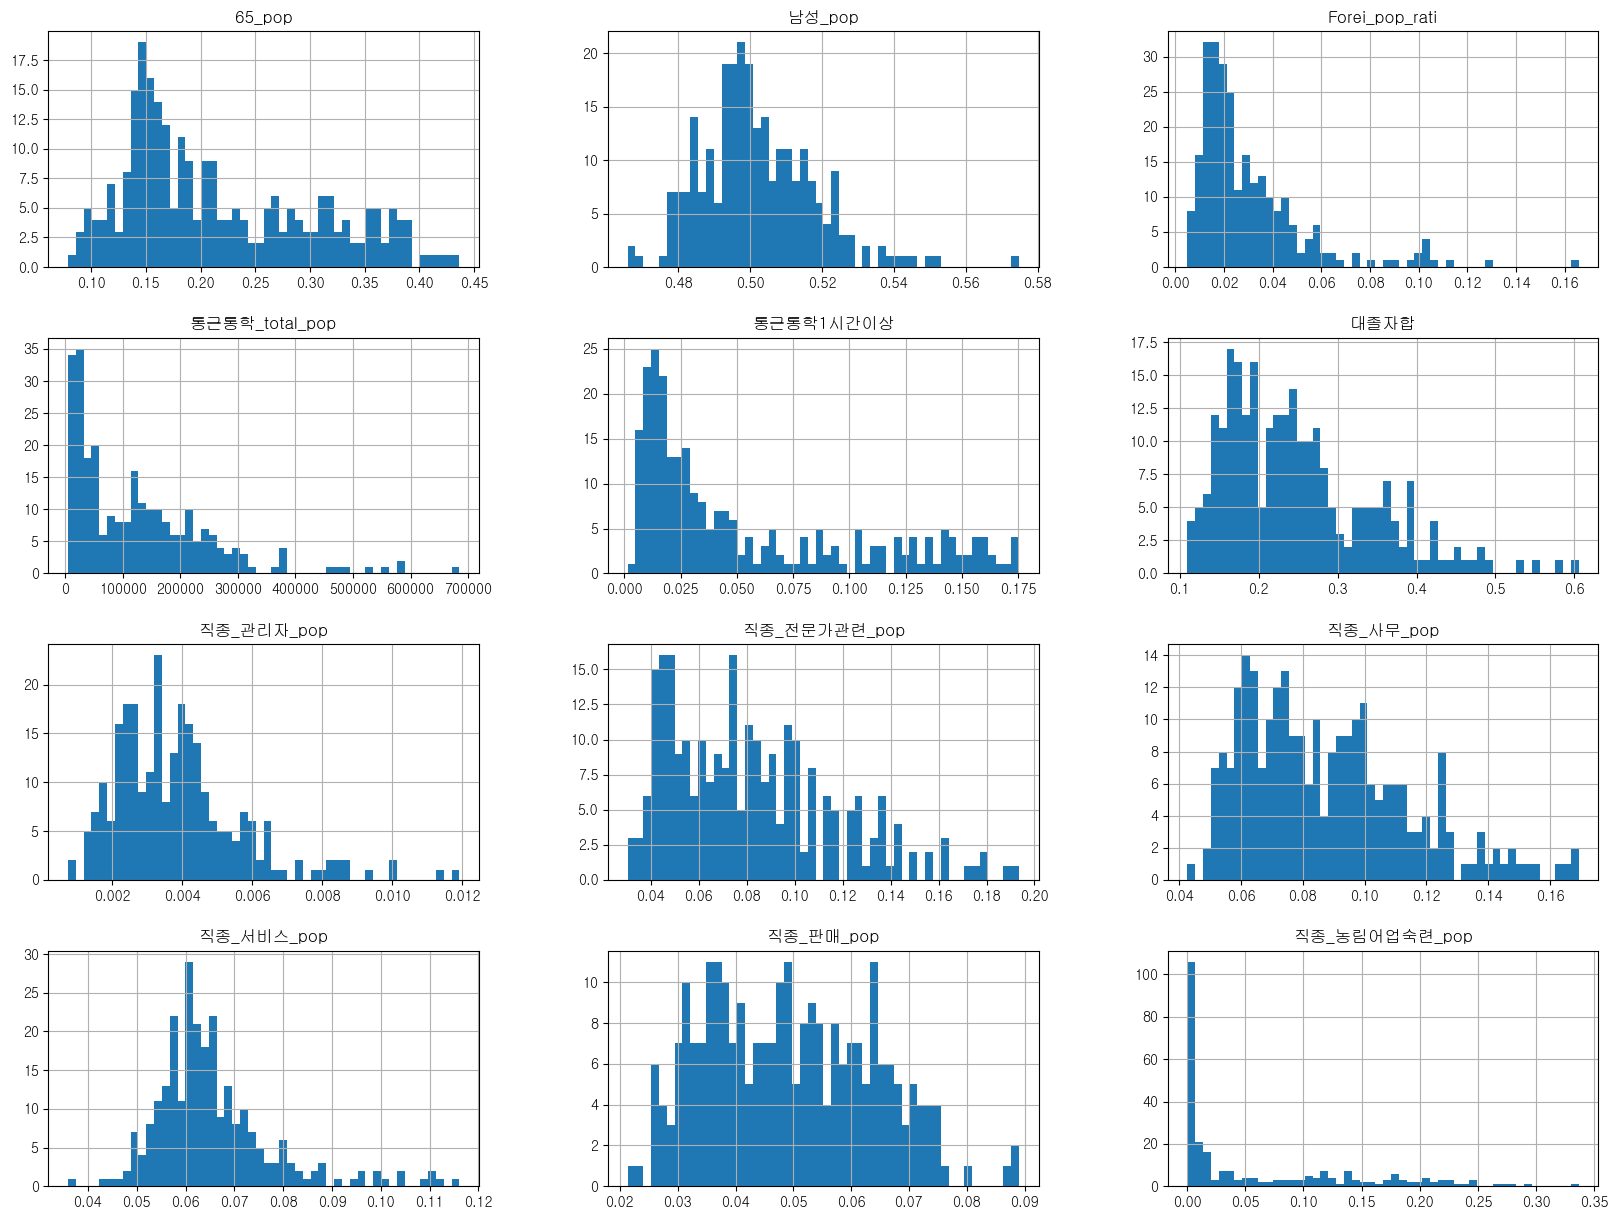

In [16]:
region_all_data_for_test.iloc[:,1:13].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'직종_기능원관련_pop'}>,
        <AxesSubplot:title={'center':'직종_장치기계조작조립_pop'}>,
        <AxesSubplot:title={'center':'직종_단순노무_pop'}>],
       [<AxesSubplot:title={'center':'직종_기타_pop'}>,
        <AxesSubplot:title={'center':'A.농업,임업및어업_pop'}>,
        <AxesSubplot:title={'center':'B.광업_pop'}>],
       [<AxesSubplot:title={'center':'C.제조업_pop'}>,
        <AxesSubplot:title={'center':'D.전기,가스,증기및공기조절공급업_pop'}>,
        <AxesSubplot:title={'center':'E.수도,하수및폐기물처리,원료재생업_pop'}>],
       [<AxesSubplot:title={'center':'F.건설업_pop'}>,
        <AxesSubplot:title={'center':'G.도매및소매업_pop'}>,
        <AxesSubplot:title={'center':'H.운수업및창고업_pop'}>]], dtype=object)

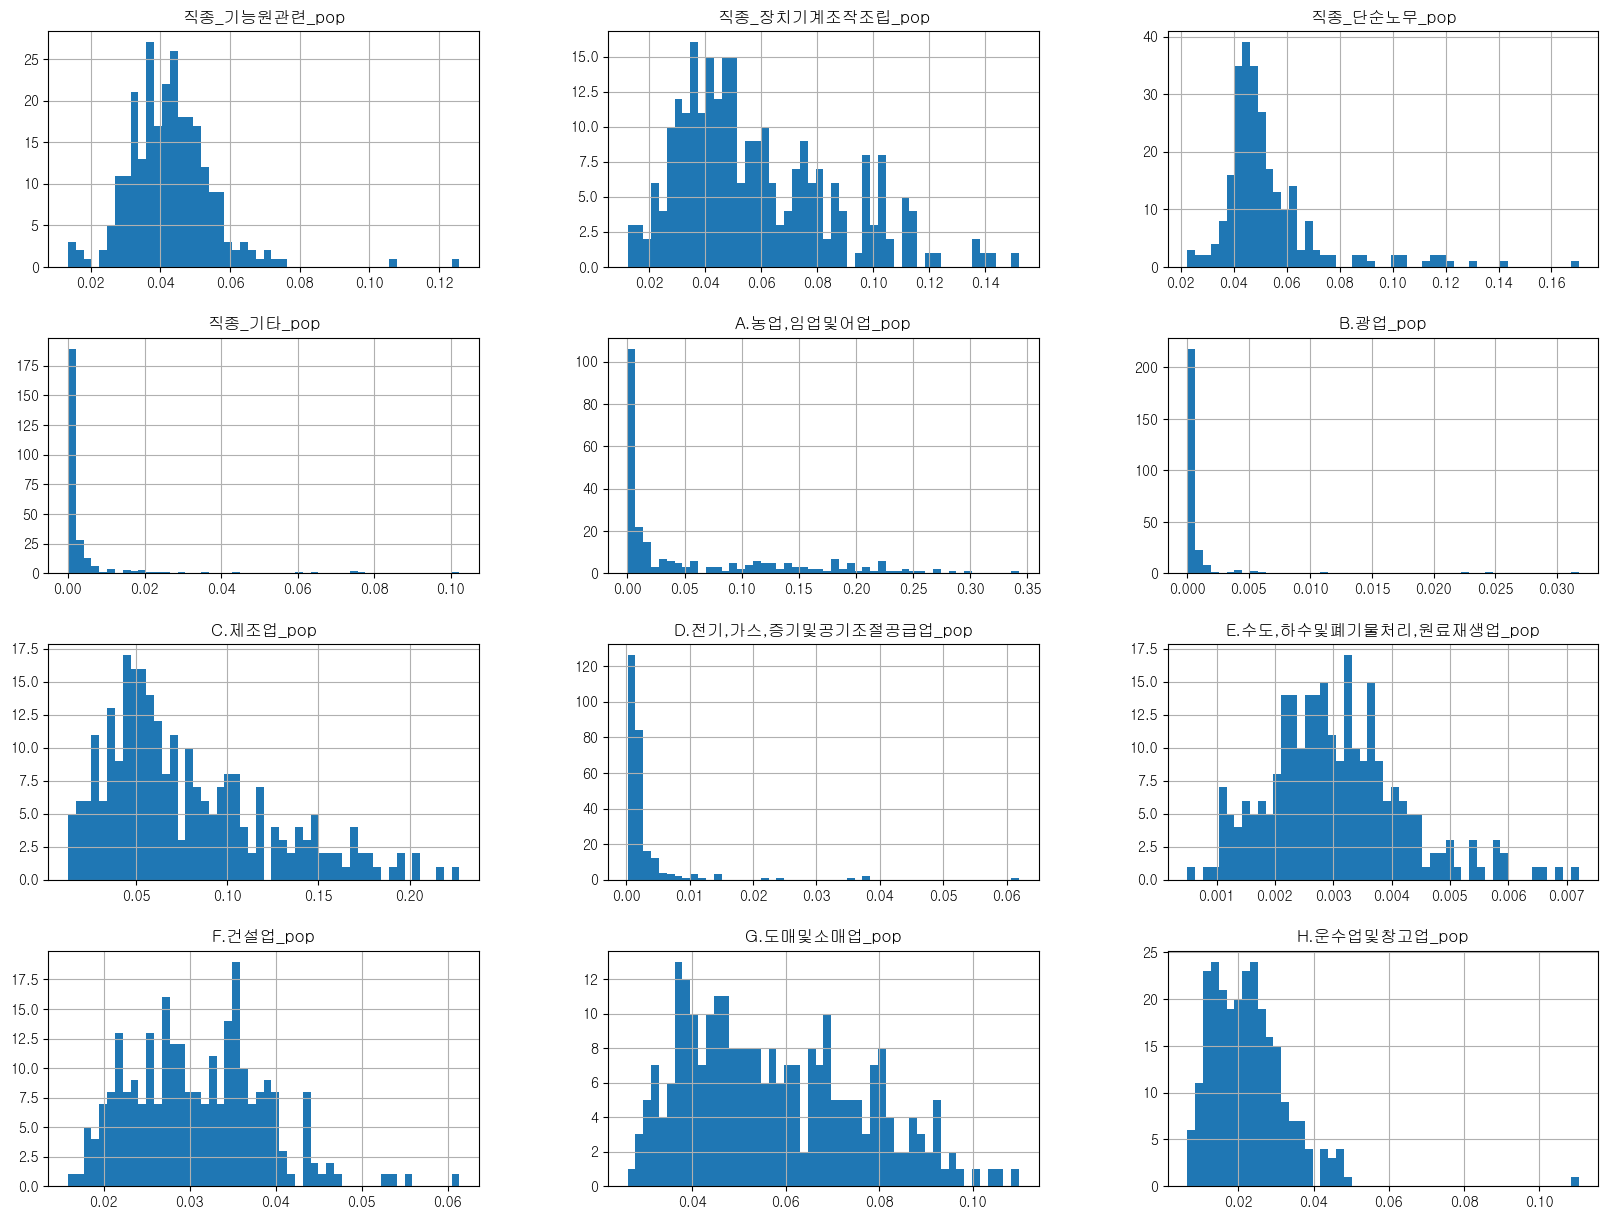

In [17]:
region_all_data_for_test.iloc[:,13:25].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'I.숙박및음식점업_pop'}>,
        <AxesSubplot:title={'center':'J.정보통신업_pop'}>,
        <AxesSubplot:title={'center':'K.금융및보험업_pop'}>],
       [<AxesSubplot:title={'center':'L.부동산업_pop'}>,
        <AxesSubplot:title={'center':'M.전문,과학및기술서비스업_pop'}>,
        <AxesSubplot:title={'center':'N.사업시설관리,사업지원및임대서비스업_pop'}>],
       [<AxesSubplot:title={'center':'O.공공행정,국방및사회보장행정_pop'}>,
        <AxesSubplot:title={'center':'P.교육서비스업_pop'}>,
        <AxesSubplot:title={'center':'Q.보건업및사회복지서비스업_pop'}>],
       [<AxesSubplot:title={'center':'R.예술,스포츠및여가관련서비스업_pop'}>,
        <AxesSubplot:title={'center':'S.협회및단체,수리및기타개인서비스업_pop'}>,
        <AxesSubplot:title={'center':'T.가구내고용활동및달리분류되지않은자가소비생산활동_pop'}>]],
      dtype=object)

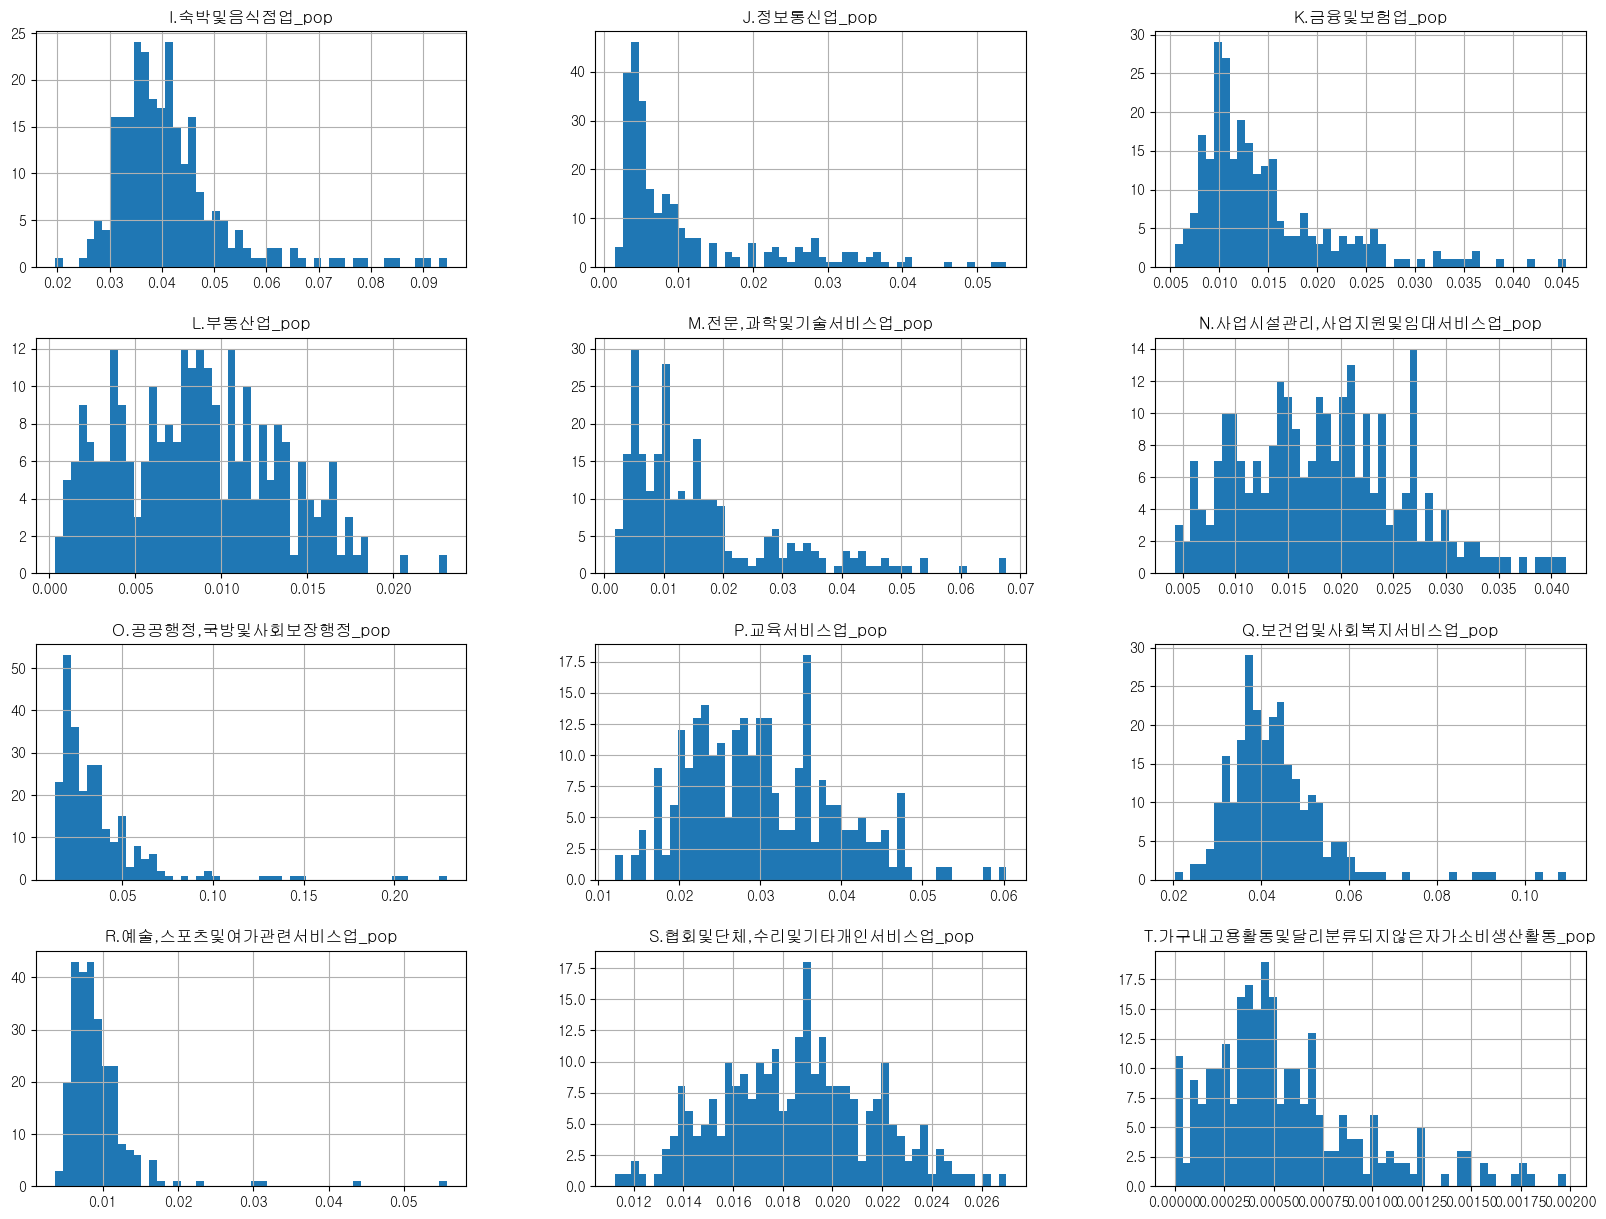

In [19]:
region_all_data_for_test.iloc[:,25:37].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'U.국제및외국기관_pop'}>,
        <AxesSubplot:title={'center':'노후주택비율'}>,
        <AxesSubplot:title={'center':'재정자립도(세입과목개편후)'}>],
       [<AxesSubplot:title={'center':'거주지외타지역통근취업자'}>,
        <AxesSubplot:title={'center':'고용률'}>,
        <AxesSubplot:title={'center':'실업률'}>],
       [<AxesSubplot:title={'center':'인구십만명당_문화기반시설수'}>,
        <AxesSubplot:title={'center':'청년고용률_2022.1/2'}>,
        <AxesSubplot:title={'center':'1인당_자동차등록대수'}>],
       [<AxesSubplot:title={'center':'도로포장률'}>,
        <AxesSubplot:title={'center':'지역내총생산'}>,
        <AxesSubplot:title={'center':'순생산물세'}>]], dtype=object)

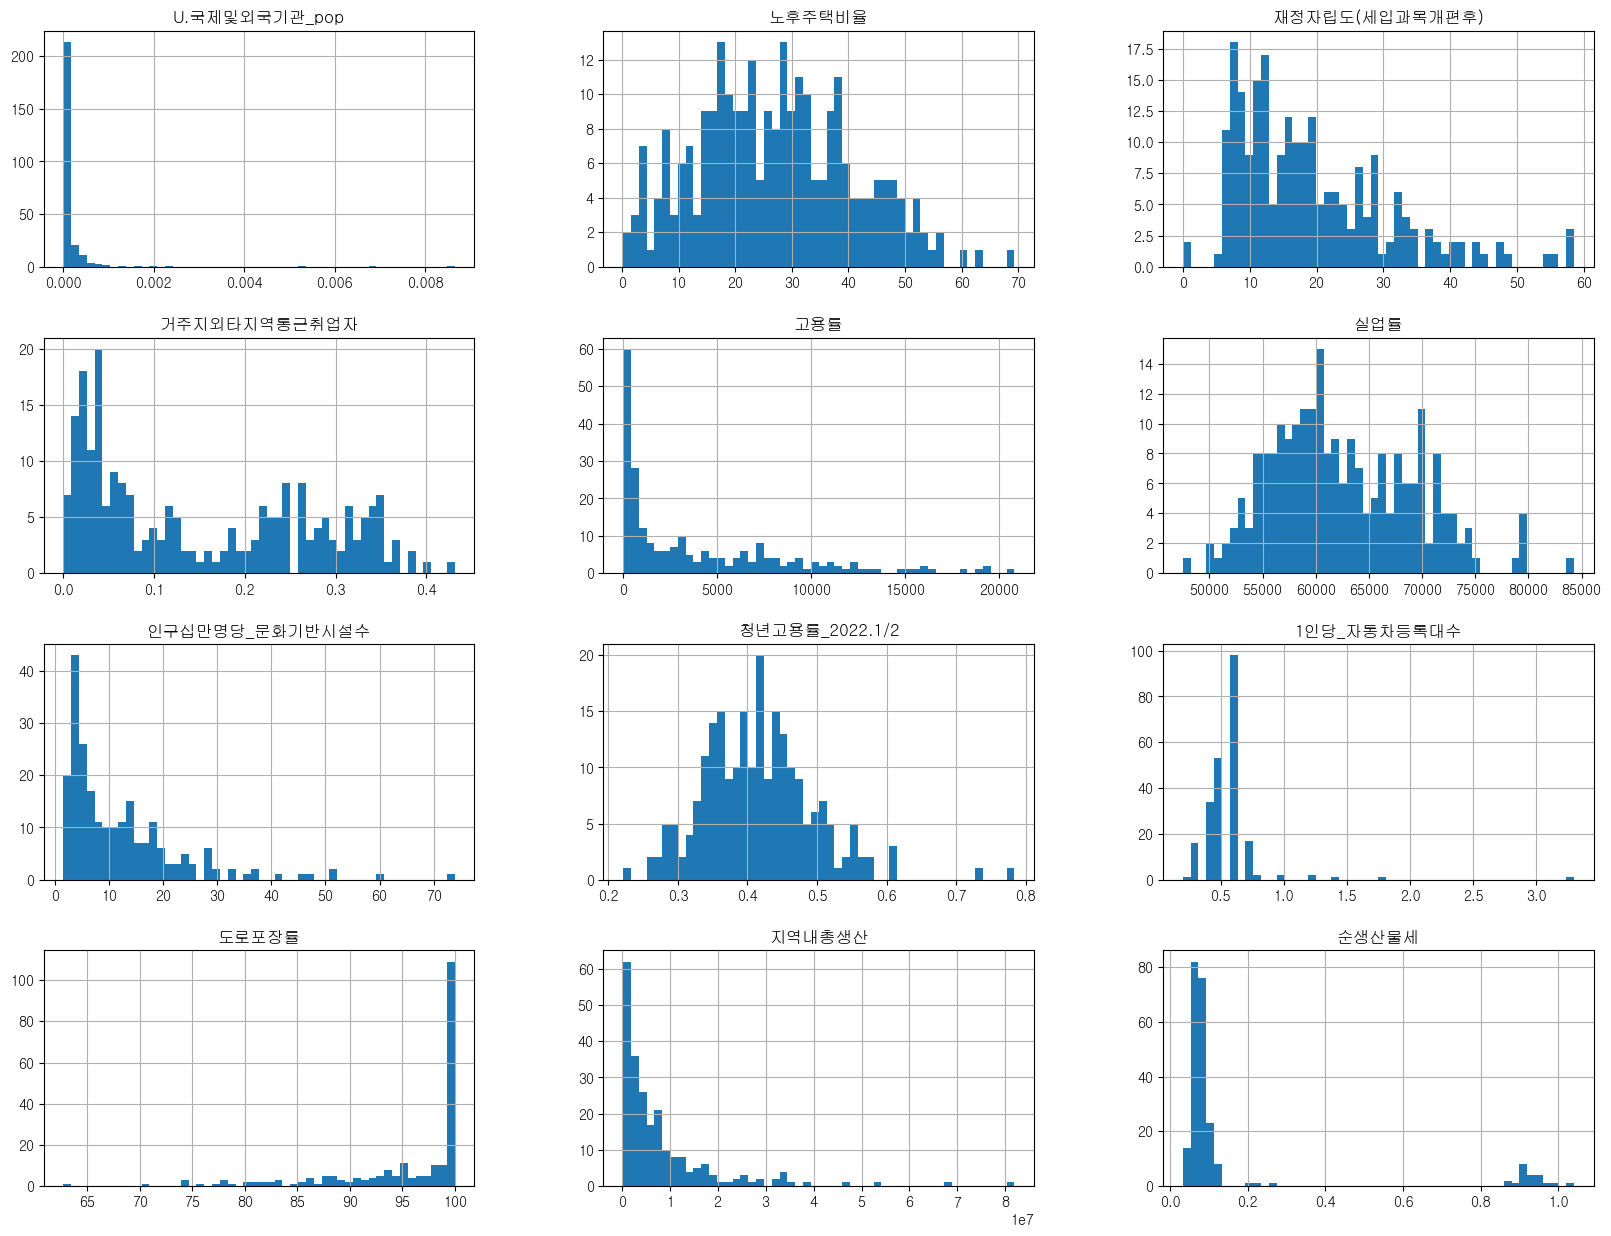

In [20]:
region_all_data_for_test.iloc[:,37:49].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'총부가가치'}>,
        <AxesSubplot:title={'center':'농업어업임업_부가가치'}>,
        <AxesSubplot:title={'center':'광업_부가가치'}>],
       [<AxesSubplot:title={'center':'제조업_부가가치'}>,
        <AxesSubplot:title={'center':'전기가스증기공기조절_부가가치'}>,
        <AxesSubplot:title={'center':'건설업_부가가치'}>],
       [<AxesSubplot:title={'center':'도매소매업_부가가치'}>,
        <AxesSubplot:title={'center':'운수창고업_부가가치'}>,
        <AxesSubplot:title={'center':'숙박음식점업_부가가치'}>],
       [<AxesSubplot:title={'center':'정보통신업_부가가치'}>,
        <AxesSubplot:title={'center':'금융보험업_부가가치'}>,
        <AxesSubplot:title={'center':'부동산업_부가가치'}>]], dtype=object)

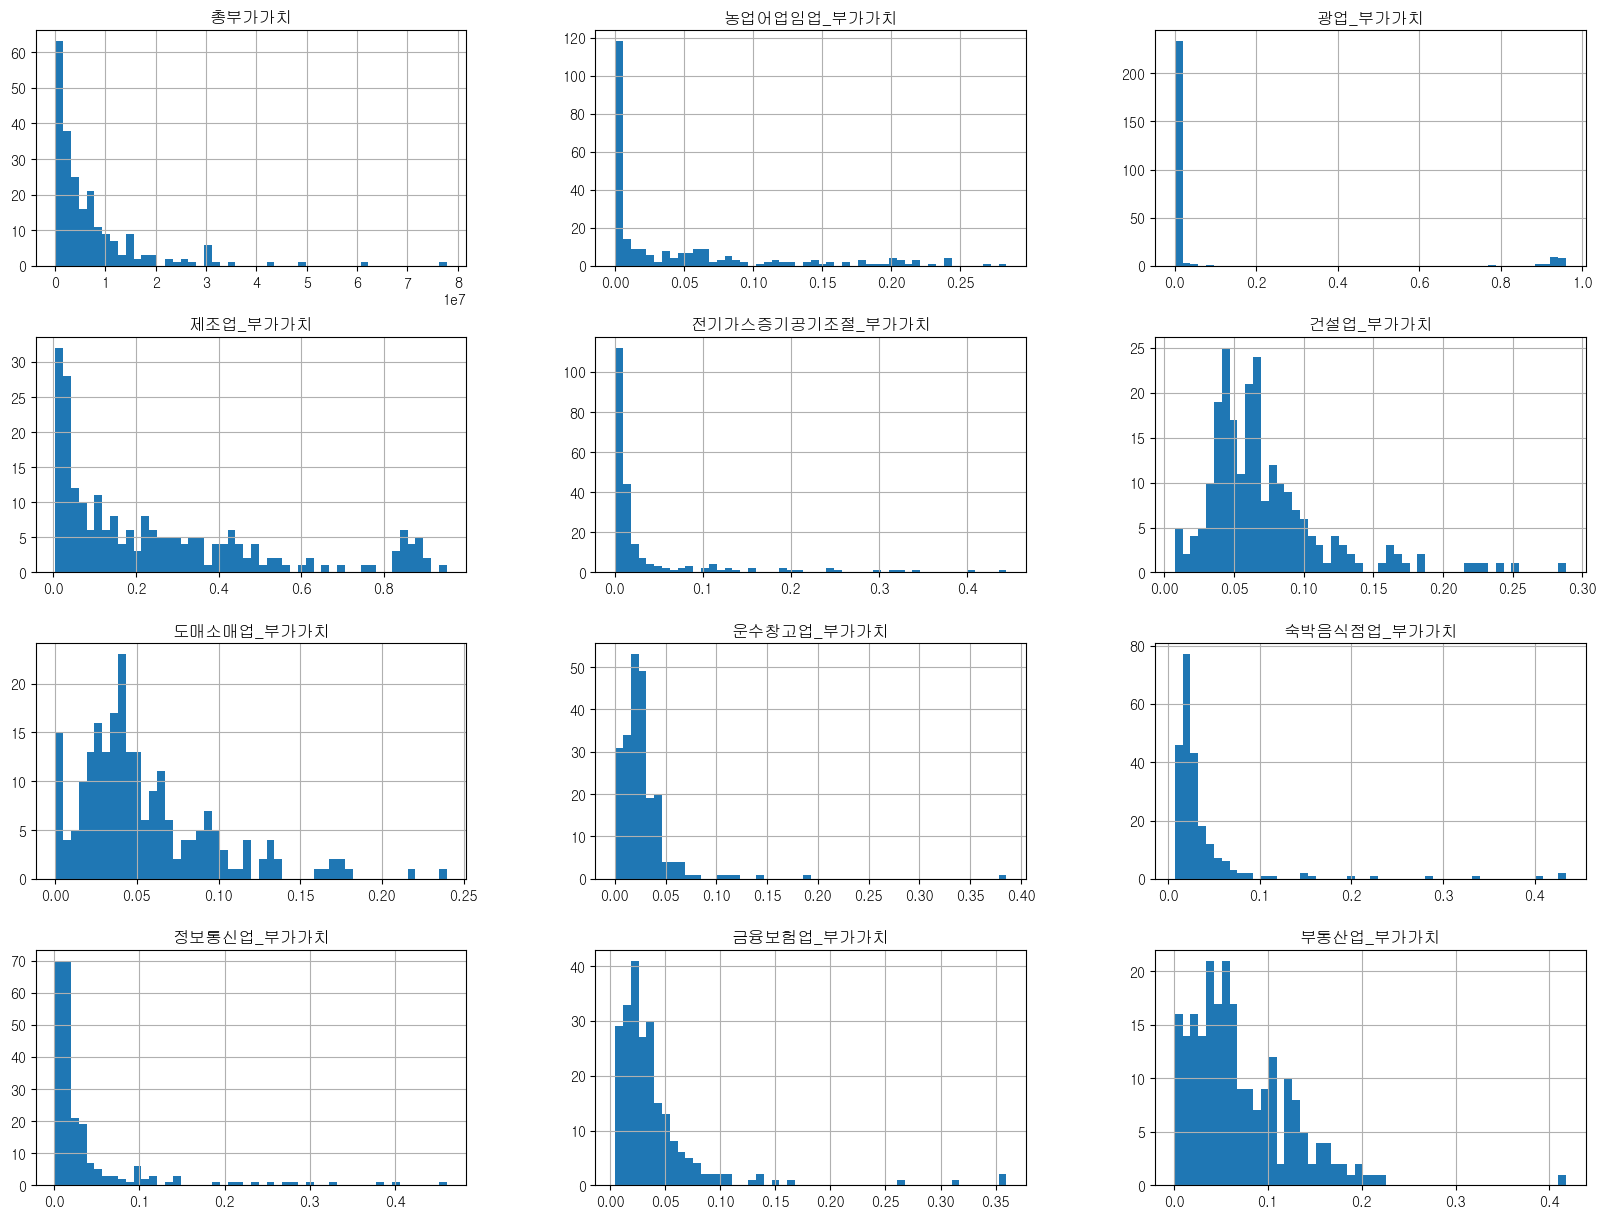

In [21]:
region_all_data_for_test.iloc[:,49:61].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'사업서비스업_부가가치'}>,
        <AxesSubplot:title={'center':'공공행정국방사회보장행정_부가가치'}>,
        <AxesSubplot:title={'center':'교육서비스업_부가가치'}>],
       [<AxesSubplot:title={'center':'보건사회복지서비스업_부가가치'}>,
        <AxesSubplot:title={'center':'문화및기타서비스업_부가가치'}>,
        <AxesSubplot:title={'center':'고등학교_도보대중교통_30분_이내_pop_ratio'}>],
       [<AxesSubplot:title={'center':'공공의료시설_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'공항_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'대규모점포_도보대중교통_30분_이내_pop_ratio'}>],
       [<AxesSubplot:title={'center':'버스터미널_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'병·의원_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'전통시장_도보대중교통_30분_이내_pop_ratio'}>]],
      dtype=object)

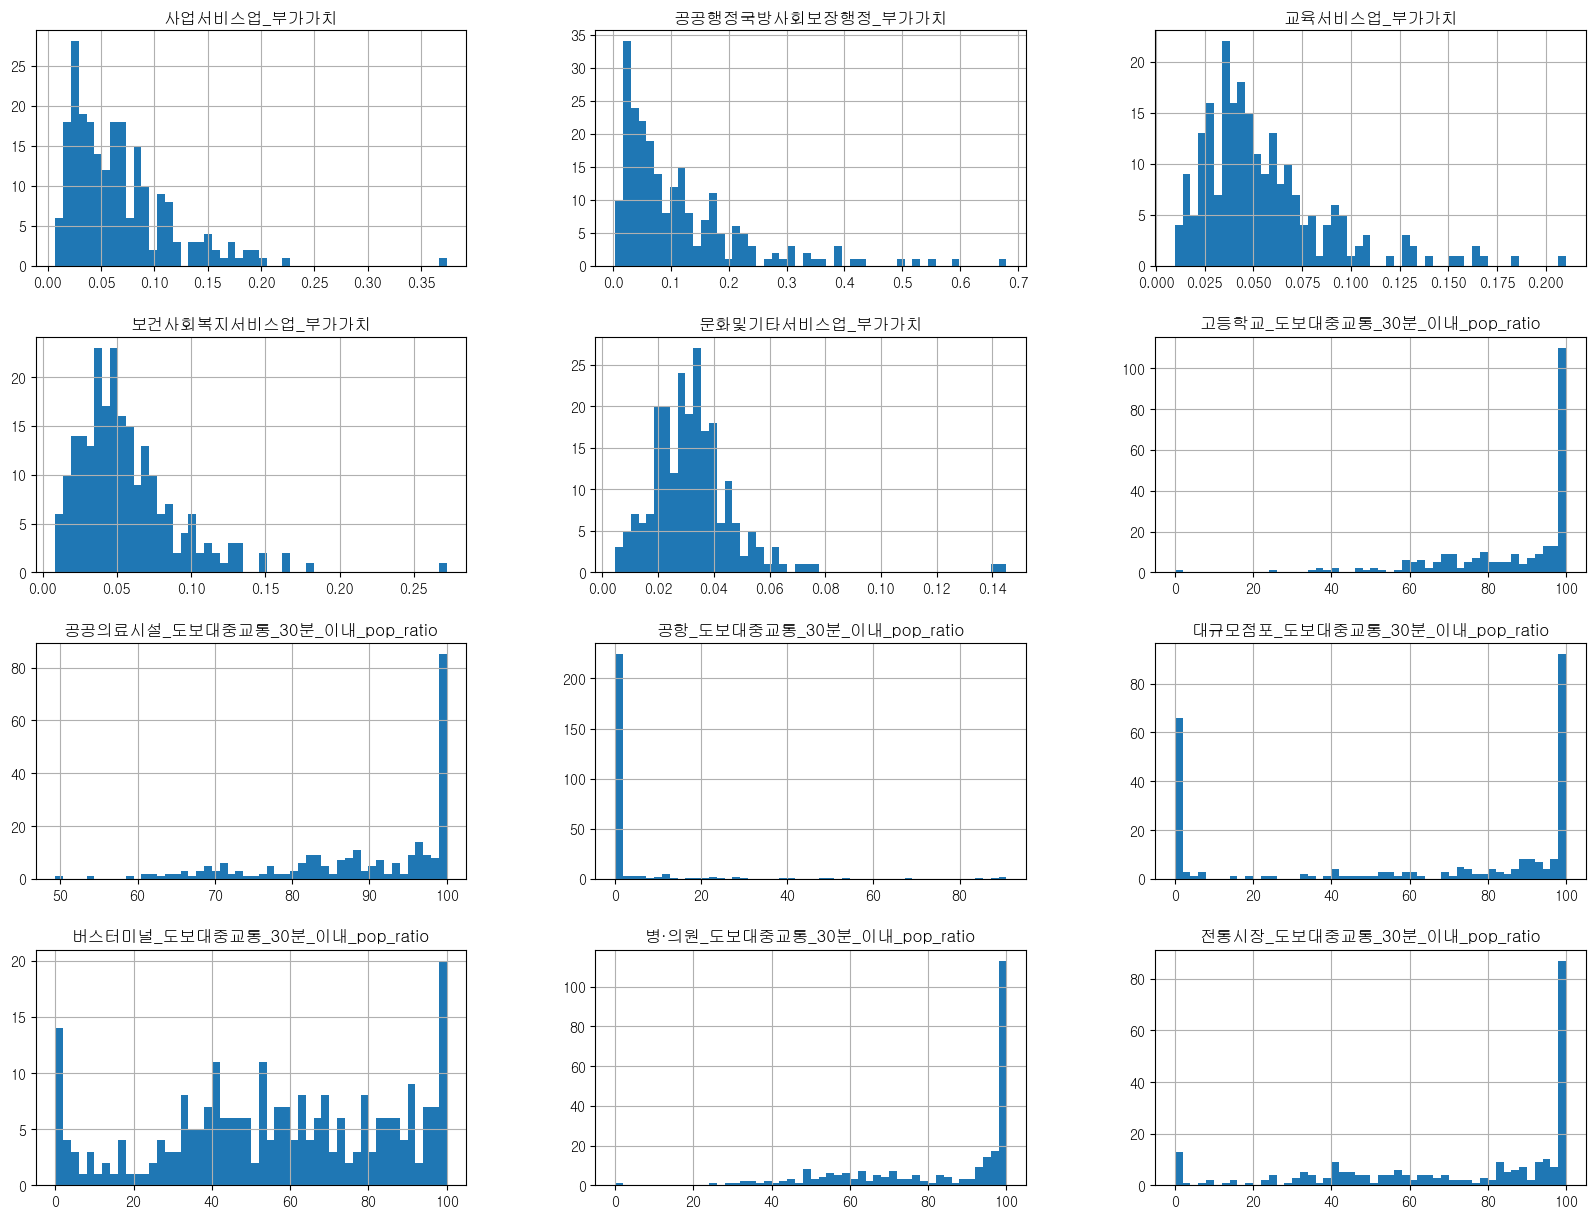

In [22]:
region_all_data_for_test.iloc[:,61:73].hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'종합병원_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'중학교_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'철도역_도보대중교통_30분_이내_pop_ratio'}>],
       [<AxesSubplot:title={'center':'초등학교_도보대중교통_30분_이내_pop_ratio'}>,
        <AxesSubplot:title={'center':'유입인구_2021'}>,
        <AxesSubplot:title={'center':'유출인구_2021'}>],
       [<AxesSubplot:title={'center':'순이동_2021'}>,
        <AxesSubplot:title={'center':'야당비율_2018'}>,
        <AxesSubplot:title={'center':'야당비율_2022'}>],
       [<AxesSubplot:title={'center':'2018_투표율'}>,
        <AxesSubplot:title={'center':'2022_투표율'}>, <AxesSubplot:>]],
      dtype=object)

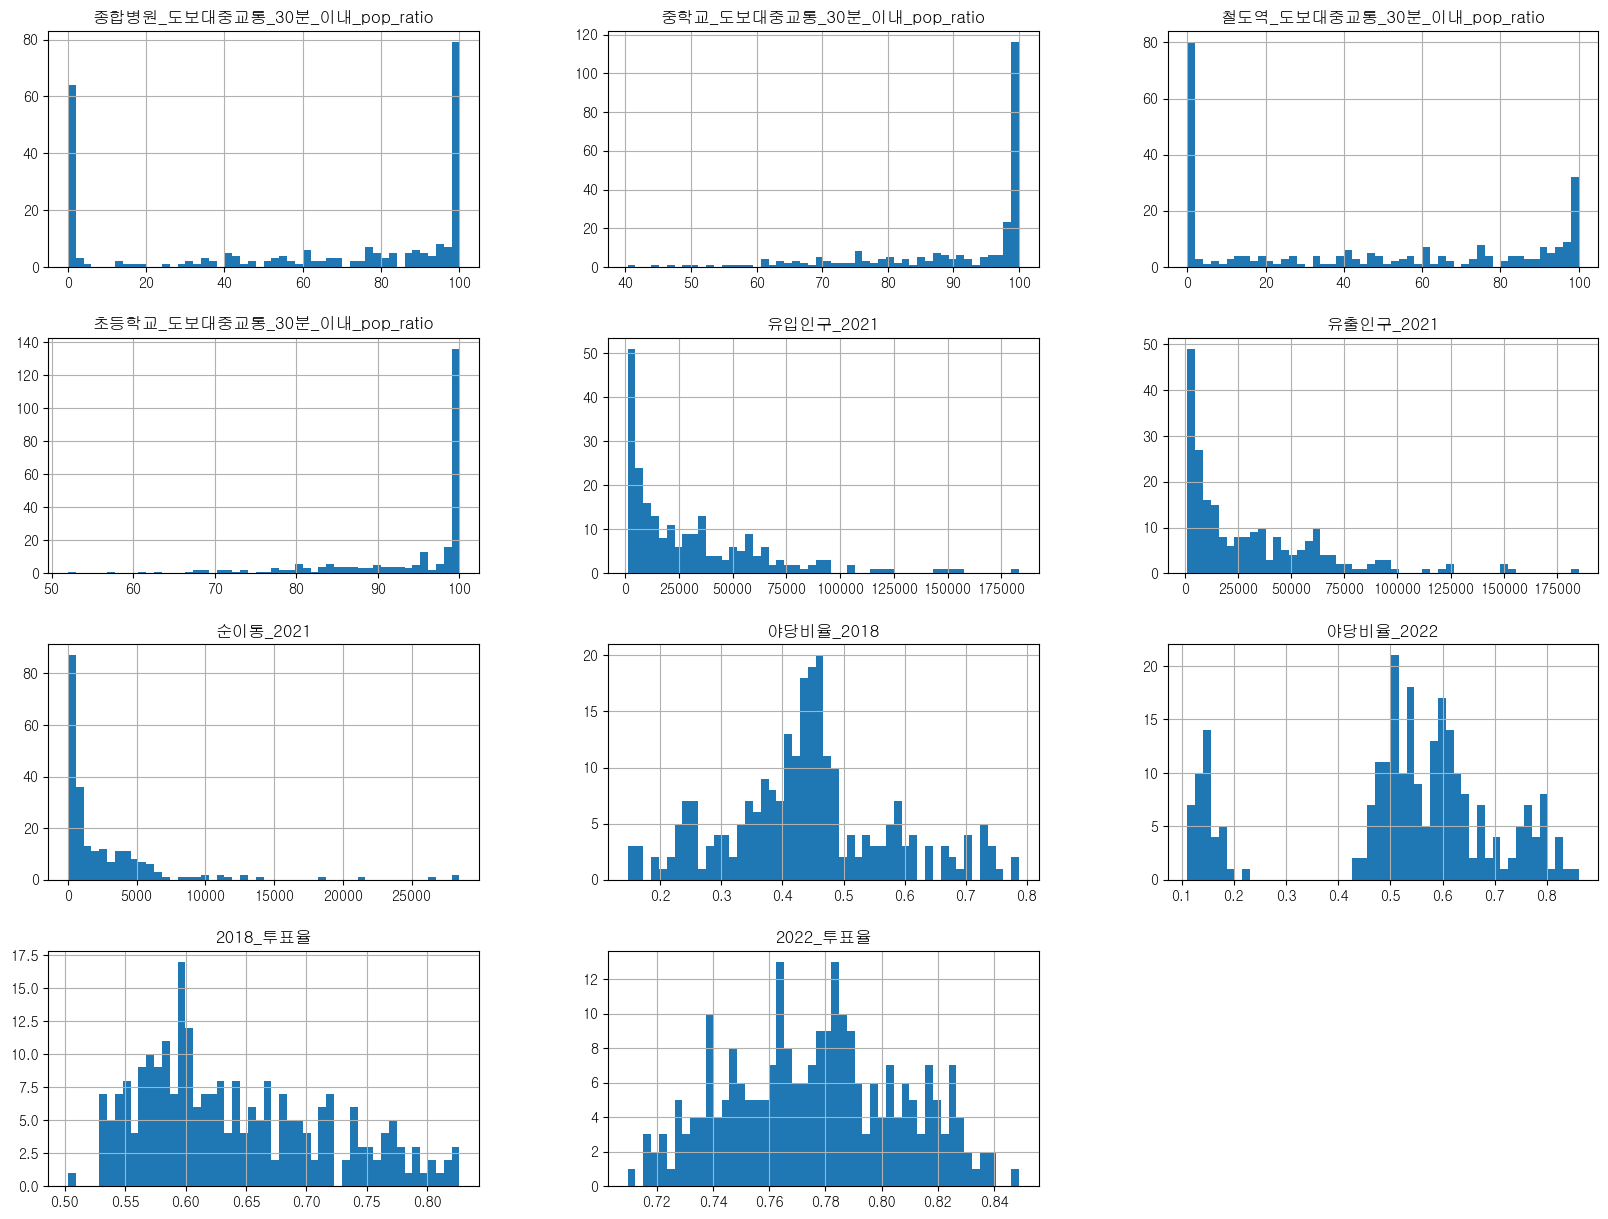

In [23]:
region_all_data_for_test.iloc[:,73:84].hist(bins=50, figsize=(20,15))

### PCA 예시

In [25]:
from sklearn.decomposition import PCA

In [36]:
pca_beta = PCA(n_components=9)

# fit PCA to the data
prin_components_beta = pca_beta.fit_transform(region_all_data_for_test.T)

# create new dataframe with principal components
pca_df_beta = pd.DataFrame(data = prin_components_beta, index = region_all_data_for_test.columns)

- 아래 PCA 결과의 첫번째 주성분(첫번째 열)을 보면, 65세 이상 인구-농업어업임업-보건행정관련 서비스 쪽이 높은 가중치의 "Positive"한 방향임을 확인할 수 있습니다. 그렇다면, 첫번째 주성분을 뽑아 일종의 '인구 및 산업군 노령화 지표'와 같은 식으로 설정할 수 있습니다.

In [37]:
pca_df_beta

0          1         2         3  \
total_pop                       -7.902034   3.963170 -2.146256 -2.588291   
65_pop                          17.179996  -4.401629 -2.075733  2.978510   
남성_pop                           9.479051   9.311761  5.040344 -7.409749   
Forei_pop_rati                   2.994162   7.872041 -1.338788 -3.574374   
통근통학_total_pop                  -7.995596   3.618692 -2.398288 -2.626147   
통근통학1시간이상                       -8.462869  -1.980548 -3.379936 -0.920729   
대졸자합                            -9.299994  -4.401546 -4.987803 -2.558924   
직종_관리자_pop                      -0.002800  -2.603197 -3.483236 -5.313643   
직종_전문가관련_pop                   -10.161718  -2.465026 -4.907536 -2.010849   
직종_사무_pop                       -9.615607  -2.227546 -4.540661 -3.124248   
직종_서비스_pop                       7.839562  -6.961370  8.372552 -0.105685   
직종_판매_pop                       -9.546805  -3.146674  1.456788  3.042191   
직종_농림어업숙련_pop                   17.909466  -1.086284 -4.876972  0.947587   
직종_기능원관련_pop                     0.198452   7.073094  8.467093  5.012776   
직종_장치기계조작조립_pop                  2.379765  13.239378  7.342011 -0.745221   
직종_단순노무_pop                     11.553712  -4.069791  6.436064 -2.700453   
직종_기타_pop                        7.648068  -2.033739  3.247071 -7.844809   
A.농업,임업및어업_pop                  17.916688  -1.083175 -4.881965  0.964609   
B.광업_pop                         8.164699  -0.688919  0.772665  0.784185   
C.제조업_pop                       -1.210532  13.708318  3.986589 -1.764705   
D.전기,가스,증기및공기조절공급업_pop           7.242380   0.438623  1.039778 -0.562543   
E.수도,하수및폐기물처리,원료재생업_pop          9.624103   4.220905  7.920414 -3.290588   
F.건설업_pop                       -0.343508   0.409638  8.188165  2.569607   
G.도매및소매업_pop                    -9.847755  -3.948167 -0.865847  2.009509   
H.운수업및창고업_pop                   -4.747557   3.316595  6.046311  2.438646   
I.숙박및음식점업_pop                    3.502902  -6.417975  5.976459 -2.329944   
J.정보통신업_pop                     -7.642542  -4.331013 -6.528804 -2.212288   
K.금융및보험업_pop                    -7.410550  -6.081442 -6.120056  0.761331   
L.부동산업_pop                     -11.097396  -2.247050 -1.349090 -0.743853   
M.전문,과학및기술서비스업_pop              -8.863034  -2.929584 -6.574333 -3.199959   
N.사업시설관리,사업지원및임대서비스업_pop        -7.803939   0.628714  2.934762  1.122952   
O.공공행정,국방및사회보장행정_pop            13.215109  -4.637143  1.490698 -6.677087   
P.교육서비스업_pop                    -6.428555  -4.086627 -1.184877 -1.366955   
Q.보건업및사회복지서비스업_pop               6.880524  -6.803852  4.299548  4.455205   
R.예술,스포츠및여가관련서비스업_pop            4.106610  -5.379635  3.582268 -3.097469   
S.협회및단체,수리및기타개인서비스업_pop         -3.919656  -3.734667  4.827565  5.523361   
T.가구내고용활동및달리분류되지않은자가소비생산활동_pop  -7.809783  -3.913018 -2.292829 -0.423801   
U.국제및외국기관_pop                    1.935864   2.057980  1.670347 -0.814413   
노후주택비율                          15.081604  -3.229540 -1.169906  5.048343   
재정자립도(세입과목개편후)                  -7.560271   4.866455 -3.398858 -5.549522   
거주지외타지역통근취업자                    -9.777404  -1.582832 -1.022852  1.284831   
고용률                             -8.146147   2.949350 -1.786049 -2.043101   
실업률                             16.784356   1.587747 -3.556149 -4.018873   
인구십만명당_문화기반시설수                  14.458661  -3.144356 -0.906852 -3.579436   
청년고용률_2022.1/2                   4.517385   0.333211 -1.485088 -4.006428   
1인당_자동차등록대수                     11.617557   3.629189 -3.081876  0.283382   
도로포장률                           -5.829124   1.469155  1.771020  1.272906   
지역내총생산                          -4.845456   6.245700 -4.669469 -5.893702   
순생산물세                            9.148580   4.998147 -7.209194  8.460831   
총부가가치                           -5.034475   5.641750 -4.291823 -6.664616   
농업어업임업_부가가치                     15.302367  -2.604905 -1.605569 -0.658699   
광업_부가가치                         10.082139   4.311623 -7.313582  8.315781   
제조업_부가가치    